<a href="https://colab.research.google.com/github/Prabandari0607/SC-Lab-Prabandari/blob/main/SClab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Prabandari0607/SC-Lab-Prabandari.git

fatal: destination path 'SC-Lab-Prabandari' already exists and is not an empty directory.


In [ ]:
import numpy as np

In [ ]:
a = [
    [2, 3, -1],
    [1, -1, 2],
    [3, 2, 1]
]

diag = np.diag(np.abs(a))

off_diag = np.sum(np.abs(a), axis=1) - diag

if np.all(diag > off_diag):
 a = [
    [2, 3, -1],
    [1, -1, 2],
    [3, 2, 1]
]

import numpy as np
diag = np.diag(np.abs(a))

off_diag = np.sum(np.abs(a), axis=1) - diag

if np.all(diag > off_diag):
  print("matrix is diagonally dominant")
else:
  print("not diagonally dominant")

not diagonally dominant


In [ ]:
def gauss_seidel(A, b, x_init, tol=0.001, max_iter=100):

  A = np.array(A, dtype=float) #Convert to numpy array for efficient math
  b = np.array(b, dtype=float) #Convert to numpy array for efficient math
  x_init = np.array(x_init, dtype=float)

  n = len(A)
  x = x_init.copy()
  error_history = []
  iteration_count = 0

  for k in range(max_iter):
    x_old = x.copy()

    for i in range(n):
      sigma = 0

      for j in range(n):
        if j != i:
          sigma += A[i, j] * x[j]

      x[i] = (b[i] - sigma) / A[i][i]

      #Hitung error
      error = np.linalg.norm(np.array(x) - np.array(x_old), np.Inf)
      error_history.append(error)
      iteration_count += 1

      # cek konvergensi
      print(f"Iterasi {iteration_count}: x = {x[0]:.6f}, y = {x[1]:.6f}, z = {x[2]:.6f}, error = {error:.6f}")
      if error < tol:
        break
    return x, error_history, iteration_count

In [ ]:
A = [[2, 3, -1],
     [1, -1, 2],
     [3, 2, 1]]

b = [10, 4, 14]

# Nilai awal
x_init = [5, 5, 5]

# Solusi dengan metode Gauss-Seidel
print("Solusi dengan metode Gauss-Seidel:")
x_gauss, error_history, iterations = gauss_seidel(A, b, x_init, tol=0.001)
print("\nHasil akhir:")
print(f"x = {x_gauss[0]:.6f}, y = {x_gauss[1]:.6f}, z = {x_gauss[2]:.6f}")
print(f"Total iterasi: {iterations}")
print(f"Error akhir: {error_history[-1]:.6f}")

# Untuk verifikasi, kita akan melakukan perhitungan manual
print("\nVerifikasi perhitungan (satu iterasi):")
x_verify = x_init.copy()
# Iterasi 1
# x = (10 - 3*5 + 1*5) / 2 = (10 - 15 + 5) / 2 = 0 / 2 = 0
x_verify[0] = (b[0] - A[0][1]*x_verify[1] + A[0][2]*x_verify[2]) / A[0][0]
print(f"x setelah update: {x_verify[0]:.6f}")
# y = (4 - 1*0 - 2*5) / (-1) = (4 - 0 - 10) / (-1) = -6 / (-1) = 6
x_verify[1] = (b[1] - A[1][0]*x_verify[0] - A[1][2]*x_verify[2]) / A[1][1]
print(f"y setelah update: {x_verify[1]:.6f}")
# z = (14 - 3*0 - 2*6) / 1 = (14 - 0 - 12) / 1 = 2 / 1 = 2
x_verify[2] = (b[2] - A[2][0]*x_verify[0] - A[2][1]*x_verify[1]) / A[2][2]
print(f"z setelah update: {x_verify[2]:.6f}")


# Solusi dengan NumPy
print("\nSolusi dengan NumPy:")
A_np = np.array(A)
b_np = np.array(b)
x_np = np.linalg.solve(A_np, b_np)
print(f"x = {x_np[0]:.6f}, y = {x_np[1]:.6f}, z = {x_np[2]:.6f}")

# Perbandingan hasil
print("\nPerbandingan hasil:")
diff = np.abs(np.array(x_gauss) - x_np)
print(f"Perbedaan absolut: x = {diff[0]:.6f}, y = {diff[1]:.6f}, z = {diff[2]:.6f}")
print(f"Rata-rata perbedaan: {np.mean(diff):.6f}")

validation_gauss = []
validation_np = []

for i in range(len(A)):
    eq_gauss = sum(A[i][j] * x_gauss[j] for j in range(len(x_gauss)))
    eq_np = sum(A[i][j] * x_np[j] for j in range(len(x_np)))
    validation_gauss.append(eq_gauss)
    validation_np.append(eq_np)

print("\nValidasi hasil (substitusi ke persamaan asli):")
print(f"Persamaan 1 (harusnya = {b[0]}): Gauss-Seidel = {validation_gauss[0]:.6f}, NumPy = {validation_np[0]:.6f}")
print(f"Persamaan 2 (harusnya = {b[1]}): Gauss-Seidel = {validation_gauss[1]:.6f}, NumPy = {validation_np[1]:.6f}")
print(f"Persamaan 3 (harusnya = {b[2]}): Gauss-Seidel = {validation_gauss[2]:.6f}, NumPy = {validation_np[2]:.6f}")

Solusi dengan metode Gauss-Seidel:
Iterasi 1: x = 0.000000, y = 5.000000, z = 5.000000, error = 5.000000
Iterasi 2: x = 0.000000, y = 6.000000, z = 5.000000, error = 5.000000
Iterasi 3: x = 0.000000, y = 6.000000, z = 2.000000, error = 5.000000

Hasil akhir:
x = 0.000000, y = 6.000000, z = 2.000000
Total iterasi: 3
Error akhir: 5.000000

Verifikasi perhitungan (satu iterasi):
x setelah update: -5.000000
y setelah update: 1.000000
z setelah update: 27.000000

Solusi dengan NumPy:
x = 0.650000, y = 4.150000, z = 3.750000

Perbandingan hasil:
Perbedaan absolut: x = 0.650000, y = 1.850000, z = 1.750000
Rata-rata perbedaan: 1.416667

Validasi hasil (substitusi ke persamaan asli):
Persamaan 1 (harusnya = 10): Gauss-Seidel = 16.000000, NumPy = 10.000000
Persamaan 2 (harusnya = 4): Gauss-Seidel = -2.000000, NumPy = 4.000000
Persamaan 3 (harusnya = 14): Gauss-Seidel = 14.000000, NumPy = 14.000000


In [ ]:
def gauss_seidel(A, b, x_init, tol=0.001, max_iter=100):
  A = np.array(A, dtype=float) #Convert to numpy array for efficient math
  b = np.array(b, dtype=float) #Convert to numpy array for efficient math
  x_init = np.array(x_init, dtype=float)

  n= len(A)
  x = x_init.copy()
  error_history = []
  iteration_count = 0

  for k in range(max_iter):
    x_old = x.copy()

    for i in range(n):
      sigma = 0

      for j in range(n):
        if j != i:
          sigma += A[i, j] * x[j]

      #update nilai xi
      x[i] = (b[i] - sigma) / A[i][i]

      #Hitung error
      error = np.linalg.norm(np.array(x) - np.array(x_old), np.Inf)
      error_history.append(error)
      iteration_count += 1

      #cetak hasil iterasi
      print(f"Iterasi {iteration_count}: x = {x[0]:.6f}, y = {x[1]:.6f}, z = {x[2]:.6f}, error = {error:.6f}")
      if error < tol:
        break
  return x, error_history, iteration_count

  A= [[3, -0.1, -0.2],
      [0.1, 7, -0.3],
      [0.3, -0.2, 10]]

  b= [7.85, -19.3, 71.4]

  print("Memeriksa apakah mariks diagonally dominant: ")
  is_diagonally_dominant = True
  for i in range(len(A)):
    diagonal = abs(A[i][i])
    diag_sum = sum(abs(A[i][j]) for j in range(len(A[i])) if j != i)
    print(f"Baris {i+1}: |{A[i][i]}| = {diagonal} vs Sum lainnya = {sum_other}")
    if diagonal <= diag_sum:
      is_diagonally_dominant = False
      break
  if is_diagonally_dominant:
    print("Matriks diagonally dominant.")
  else:
    print("Matriks tidak diagonally dominant.")

x_init = [1,2,3]

print("Solusi dengan metode Gauss-Seidel:")
x_gauss, error_history, iterations = gauss_seidel(A, b, x_init, tol=0.001)
print("\nHasil akhir:")
print(f"x = {x_gauss[0]:.6f}, y = {x_gauss[1]:.6f}, z = {x_gauss[2]:.6f}")
print(f"Total iterasi: {iterations}")
print(f"Error akhir: {error_history[-1]:.6f}")

print("\nSolusi dengan NumPy:")
A_np = np.array(A)
b_np = np.array(b)
x_np = np.linalg.solve(A_np, b_np)
print(f"x = {x_np[0]:.6f}, y = {x_np[1]:.6f}, z = {x_np[2]:.6f}")

# Perbandingan hasil
print("\nPerbandingan hasil:")
diff = np.abs(np.array(x_gauss) - x_np)
print(f"Perbedaan absolut: x = {diff[0]:.6f}, y = {diff[1]:.6f}, z = {diff[2]:.6f}")
print(f"Rata-rata perbedaan: {np.mean(diff):.6f}")

validation_gauss = []
validation_np = []

for i in range(len(A)):
    eq_gauss = sum(A[i][j] * x_gauss[j] for j in range(len(x_gauss)))
    eq_np = sum(A[i][j] * x_np[j] for j in range(len(x_np)))
    validation_gauss.append(eq_gauss)
    validation_np.append(eq_np)

print("\nValidasi hasil (substitusi ke persamaan asli):")
print(f"Persamaan 1 (harusnya = {b[0]}): Gauss-Seidel = {validation_gauss[0]:.6f}, NumPy = {validation_np[0]:.6f}")
print(f"Persamaan 2 (harusnya = {b[1]}): Gauss-Seidel = {validation_gauss[1]:.6f}, NumPy = {validation_np[1]:.6f}")
print(f"Persamaan 3 (harusnya = {b[2]}): Gauss-Seidel = {validation_gauss[2]:.6f}, NumPy = {validation_np[2]:.6f}")

Solusi dengan metode Gauss-Seidel:
Iterasi 1: x = 3.500000, y = 2.000000, z = 3.000000, error = 2.500000
Iterasi 2: x = 3.500000, y = 5.500000, z = 3.000000, error = 3.500000
Iterasi 3: x = 3.500000, y = 5.500000, z = -7.500000, error = 10.500000
Iterasi 4: x = -7.000000, y = 5.500000, z = -7.500000, error = 10.500000
Iterasi 5: x = -7.000000, y = -26.000000, z = -7.500000, error = 31.500000
Iterasi 6: x = -7.000000, y = -26.000000, z = 87.000000, error = 94.500000
Iterasi 7: x = 87.500000, y = -26.000000, z = 87.000000, error = 94.500000
Iterasi 8: x = 87.500000, y = 257.500000, z = 87.000000, error = 283.500000
Iterasi 9: x = 87.500000, y = 257.500000, z = -763.500000, error = 850.500000
Iterasi 10: x = -763.000000, y = 257.500000, z = -763.500000, error = 850.500000
Iterasi 11: x = -763.000000, y = -2294.000000, z = -763.500000, error = 2551.500000
Iterasi 12: x = -763.000000, y = -2294.000000, z = 6891.000000, error = 7654.500000
Iterasi 13: x = 6891.500000, y = -2294.000000, z = 6

Hasil Least Square Method:
a (slope) = 2.0000
b (intercept) = 0.0000
Persamaan regresi: y = 2.0000x + 0.0000
R-squared: 1.0000

Perhitungan manual:
n = 5
sum_x = 27
sum_y = 54
sum_xy = 302
sum_x_squared = 151
n * sum_xy = 1510
sum_x * sum_y = 1458
n * sum_x_squared = 755
sum_x^2 = 729
a = (5 * 302 - 27 * 54) / (5 * 151 - 27^2) = 2.0000
b = (54 - 2.0000 * 27) / 5 = 0.0000

Verifikasi dengan numpy polyfit:
a (slope) = 2.0000
b (intercept) = -0.0000


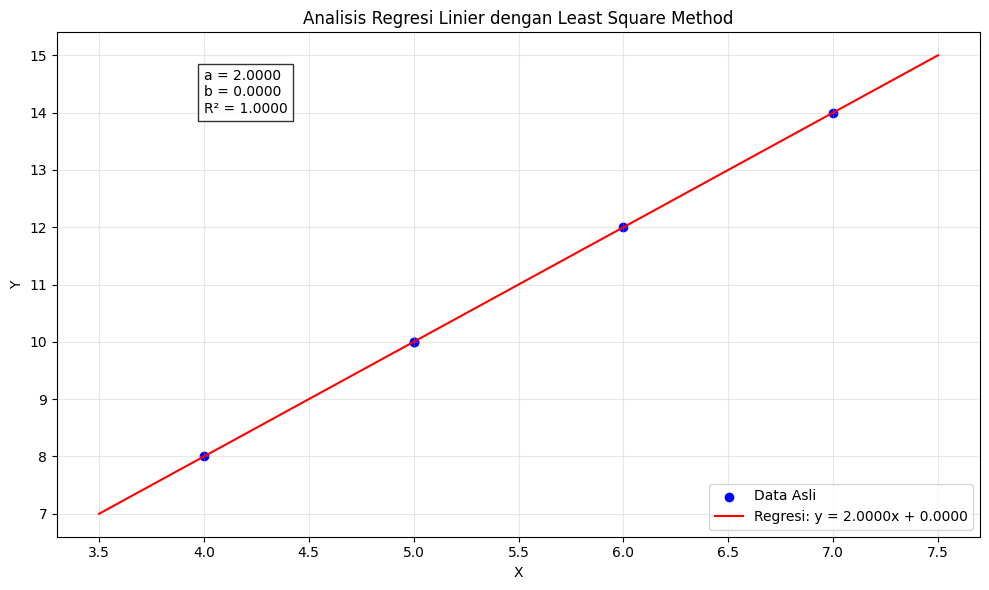

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data yang diberikan
x = np.array([5, 4, 6, 7, 5])
y = np.array([10, 8, 12, 14, 10])

n = len(x)

# Menghitung komponen yang diperlukan
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x * y)
sum_x_squared = np.sum(x**2)

a = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)

# Menghitung nilai b (intercept) menggunakan rumus LSM
b = (sum_y - a * sum_x) / n

print("Hasil Least Square Method:")
print(f"a (slope) = {a:.4f}")
print(f"b (intercept) = {b:.4f}")
print(f"Persamaan regresi: y = {a:.4f}x + {b:.4f}")

# Menghitung nilai R-squared untuk melihat kecocokan model
y_pred = a * x + b
ss_total = np.sum((y - np.mean(y))**2)
ss_residual = np.sum((y - y_pred)**2)
r_squared = 1 - (ss_residual / ss_total)
print(f"R-squared: {r_squared:.4f}")

# b. Plot hasil regresi beserta titik-titik data
plt.figure(figsize=(10, 6))

# Plot data asli sebagai scatter plot
plt.scatter(x, y, color='blue', label='Data Asli')

x_line = np.linspace(min(x)-0.5, max(x)+0.5, 100)
y_line = a * x_line + b
plt.plot(x_line, y_line, color='red', label=f'Regresi: y = {a:.4f}x + {b:.4f}')

plt.title('Analisis Regresi Linier dengan Least Square Method')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()

plt.text(min(x), max(y), f'a = {a:.4f}\nb = {b:.4f}\nR² = {r_squared:.4f}',
         bbox=dict(facecolor='white', alpha=0.8))

print("\nPerhitungan manual:")
print(f"n = {n}")
print(f"sum_x = {sum_x}")
print(f"sum_y = {sum_y}")
print(f"sum_xy = {sum_xy}")
print(f"sum_x_squared = {sum_x_squared}")
print(f"n * sum_xy = {n * sum_xy}")
print(f"sum_x * sum_y = {sum_x * sum_y}")
print(f"n * sum_x_squared = {n * sum_x_squared}")
print(f"sum_x^2 = {sum_x**2}")
print(f"a = ({n} * {sum_xy} - {sum_x} * {sum_y}) / ({n} * {sum_x_squared} - {sum_x}^2) = {a:.4f}")
print(f"b = ({sum_y} - {a:.4f} * {sum_x}) / {n} = {b:.4f}")

# Metode alternatif menggunakan numpy polyfit
slope, intercept = np.polyfit(x, y, 1)
print("\nVerifikasi dengan numpy polyfit:")
print(f"a (slope) = {slope:.4f}")
print(f"b (intercept) = {intercept:.4f}")

plt.show()